# FINAL PROJECT STUDY GROUP 02

# **I. INTRODUCTION**

Welcome everbody to this notebook! A warm welcome given to you all. As for the short introduction, here are the members of Study Group 02:

- Members: Aco, Alex, Ihsan, Maheswara, Rizky.
- Occupation : Full Time Data Science Hacktiv8 Bootcamp
- Topic of Final Project : RFM Clustering and Time Series Prediction

## 1.1 BUSINESS PROBLEM UNDERSTANDING

### 1.1.1 CONTEXT

### 1.1.2 PROBLEM STATEMENT

### 1.1.3 OBJECTIVES

### 1.1.4 ACTION AND VALUES

## 1.2 ABOUT THE DATA

# **II. IMPORTING LIBRARIES**

In [1]:
# common dataframe
import pandas as pd
import numpy as np
import pickle
import sqlite3
import re
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# math & statistic function
import scipy.stats as stats
import math

# remove all warnings, more robust
import warnings
warnings.filterwarnings("ignore")

# library for model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate

In [2]:
original_path = '../finpro-ftds-001-hck-ftds-001-hck-group-002/'

# **III. DATA LOADING**

In [3]:
df_date_rollup = pd.read_csv('dsc1069_date_rollup.csv')
df_events = pd.read_csv('dsv1069_events.csv')
df_items = pd.read_csv('dsv1069_items.csv')
df_orders = pd.read_csv('dsv1069_orders.csv')
df_users = pd.read_csv('dsv1069_users.csv')

## 3.1 DATA PREVIEW

In [4]:
df_date_rollup.head()

,date,d7_ago,d28_ago
0,2018-06-01 00:00:00,2018-05-25 00:00:00,2018-05-04 00:00:00
1,2018-05-31 00:00:00,2018-05-24 00:00:00,2018-05-03 00:00:00
2,2018-05-30 00:00:00,2018-05-23 00:00:00,2018-05-02 00:00:00
3,2018-05-29 00:00:00,2018-05-22 00:00:00,2018-05-01 00:00:00
4,2018-05-28 00:00:00,2018-05-21 00:00:00,2018-04-30 00:00:00


In [5]:
df_date_rollup.tail()

,date,d7_ago,d28_ago
1973,2013-01-05 00:00:00,2012-12-29 00:00:00,2012-12-08 00:00:00
1974,2013-01-04 00:00:00,2012-12-28 00:00:00,2012-12-07 00:00:00
1975,2013-01-03 00:00:00,2012-12-27 00:00:00,2012-12-06 00:00:00
1976,2013-01-02 00:00:00,2012-12-26 00:00:00,2012-12-05 00:00:00
1977,2013-01-01 00:00:00,2012-12-25 00:00:00,2012-12-04 00:00:00


---

In [6]:
df_events.head()

,event_id,event_time,user_id,event_name,platform,parameter_name,parameter_value
0,b9de71c5c3cc4cd7a97e50b832106e5a,2017-06-26 11:23:39,178481.0,view_item,android,item_id,3526
1,23267713c9ea44419331731f50b6a8db,2017-06-27 10:46:39,178481.0,view_item,android,item_id,1514
2,1b7822fa7b854e01970218ae8f721fe0,2017-06-27 11:15:39,178481.0,view_item,android,item_id,3712
3,2a7a188a626841ac94befcc419f06af4,2016-10-05 20:43:10,154133.0,view_item,android,item_id,3586
4,631d657264cc4616a4528f759509b25d,2016-10-04 03:29:10,154133.0,view_item,android,item_id,1061


In [7]:
df_events.tail()

,event_id,event_time,user_id,event_name,platform,parameter_name,parameter_value
853635,542e24088b464ca7b9a988986dfadb3e,2016-10-22 15:23:09,204159.0,test_assignment,server,test_id,7
853636,3248a35b0c114408bd3d3a876574429b,2016-10-22 15:23:09,174668.0,test_assignment,server,test_id,7
853637,7aaa43025ac64aa9b031d88907a4715e,2016-10-18 15:23:09,184075.0,test_assignment,server,test_id,7
853638,a6c640ffda944ea2bd283e59262d0aa8,2016-10-12 15:23:09,218373.0,test_assignment,server,test_id,7
853639,39b0fca5279649e1ba289300fcaa6aa0,2016-12-02 15:23:09,167256.0,test_assignment,server,test_id,7


---

In [8]:
df_items.head()

,adjective,category,created_at,id,modifier,name,price
0,fuzzy,contraption,2014-01-15 21:36:09,2512.0,carrying_case,fuzzy contraption carrying_case,150.0
1,NaN,instrument,2013-05-14 05:20:50,482.0,refill,instrument refill,35.2
2,industrial-strength,module,2014-02-04 19:28:32,2446.0,NaN,industrial-strength module,300.0
3,digital,tool,2013-02-25 12:23:18,1312.0,carrying_case,digital tool carrying_case,16.5
4,miniature,device,2013-08-05 17:20:45,3556.0,cleaner,miniature device cleaner,16.5


In [9]:
df_items.tail()

,adjective,category,created_at,id,modifier,name,price
2193,prize-winning,apparatus,2013-08-13 04:14:14,3952.0,charger,prize-winning apparatus charger,66.0
2194,fuzzy,dongle,2014-01-16 00:58:43,432.0,wrapper,fuzzy dongle wrapper,12.0
2195,industrial-strength,dongle,2013-12-18 21:37:01,1393.0,refill,industrial-strength dongle refill,72.0
2196,miniature,device,2013-11-27 14:14:47,425.0,NaN,miniature device,27.5
2197,NaN,widget,2013-10-10 21:13:50,325.0,how-to-manual,widget how-to-manual,0.0


---

In [10]:
df_orders.head()

,invoice_id,line_item_id,user_id,item_id,item_name,item_category,price,created_at,paid_at
0,192320.0,83118.0,178481.0,3526.0,digital apparatus,apparatus,330.0,2017-06-28 21:14:25,2017-06-27 21:19:39
1,192320.0,207309.0,178481.0,1514.0,miniature apparatus cleaner,apparatus,99.0,2017-06-28 21:14:25,2017-06-27 21:19:39
2,192320.0,392027.0,178481.0,3712.0,miniature apparatus cleaner,apparatus,99.0,2017-06-28 21:14:25,2017-06-27 21:19:39
3,80902.0,243831.0,154133.0,3586.0,reflective instrument,instrument,57.2,2016-10-09 06:57:30,2016-10-07 10:08:10
4,80902.0,399806.0,154133.0,1061.0,extra-strength instrument charger,instrument,17.6,2016-10-09 06:57:30,2016-10-07 10:08:10


In [11]:
df_orders.tail()

,invoice_id,line_item_id,user_id,item_id,item_name,item_category,price,created_at,paid_at
47397,122276.0,56104.0,92447.0,801.0,reflective device,device,65.000,2016-01-12 06:01:47,2016-01-13 03:45:44
47398,348144.0,162528.0,151538.0,3729.0,prize-winning gadget wrapper,gadget,39.160,2016-11-18 21:00:07,2016-11-18 14:19:52
47399,348144.0,321219.0,151538.0,1645.0,digital gadget carrying_case,gadget,58.740,2016-11-18 21:00:07,2016-11-18 14:19:52
47400,348144.0,264112.0,151538.0,2084.0,matte gadget storage_unit,gadget,278.125,2016-11-18 21:00:07,2016-11-18 14:19:52
47401,348144.0,58354.0,151538.0,2681.0,digital gadget charger,gadget,19.580,2016-11-18 21:00:07,2016-11-18 14:19:52


---

In [12]:
df_users.head()

,created_at,deleted_at,email_address,first_name,id,last_name,merged_at,parent_user_id
0,2014-12-20 07:07:45,NaN,ArataHopper@earthlink.info,Arata,51590.0,Hopper,NaN,NaN
1,2016-10-14 05:39:20,NaN,Riya_Gruber1974@mail.net,Riya,158891.0,Gruber,NaN,NaN
2,2017-01-21 10:20:09,NaN,Peter_Sousa@yahoo.info,Peter,179949.0,Sousa,NaN,NaN
3,2015-10-30 21:31:30,NaN,D_Kowalski1962@gmail.com,D,98000.0,Kowalski,NaN,NaN
4,2015-10-24 16:27:27,NaN,SNovak1966@mail.com,S,93994.0,Novak,NaN,NaN


In [13]:
df_users.tail()

,created_at,deleted_at,email_address,first_name,id,last_name,merged_at,parent_user_id
117173,2013-11-16 03:03:39,NaN,ADavis@inbox.com,A,11045.0,Davis,NaN,NaN
117174,2016-08-23 08:29:02,NaN,TalaAlami1959@mail.info,Tala,152456.0,Alami,NaN,NaN
117175,2017-09-21 14:33:54,NaN,HAmin@mail.info,H,236077.0,Amin,NaN,NaN
117176,2017-07-21 18:47:37,NaN,J_Petrov@gmail.edu,J,218373.0,Petrov,2018-03-14 23:32:16,99787.0
117177,2016-11-13 15:47:51,NaN,MohamedMiller@outlook.com,Mohamed,167256.0,Miller,NaN,NaN


# **IV. DATA CLEANING**

## 4.1 NULL VALUES CHECKING

In [14]:
df_date_rollup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1978 entries, 0 to 1977
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     1978 non-null   object
 1   d7_ago   1978 non-null   object
 2   d28_ago  1978 non-null   object
dtypes: object(3)
memory usage: 46.5+ KB


In [15]:
df_date_rollup.isna().sum()

date       0
d7_ago     0
d28_ago    0
dtype: int64

---

In [16]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853640 entries, 0 to 853639
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   event_id         853640 non-null  object 
 1   event_time       853640 non-null  object 
 2   user_id          853640 non-null  float64
 3   event_name       853640 non-null  object 
 4   platform         853640 non-null  object 
 5   parameter_name   853640 non-null  object 
 6   parameter_value  853640 non-null  object 
dtypes: float64(1), object(6)
memory usage: 45.6+ MB


In [17]:
df_events.isna().sum()

event_id           0
event_time         0
user_id            0
event_name         0
platform           0
parameter_name     0
parameter_value    0
dtype: int64

---

In [18]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198 entries, 0 to 2197
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   adjective   1926 non-null   object 
 1   category    2198 non-null   object 
 2   created_at  2198 non-null   object 
 3   id          2198 non-null   float64
 4   modifier    1432 non-null   object 
 5   name        2198 non-null   object 
 6   price       2198 non-null   float64
dtypes: float64(2), object(5)
memory usage: 120.3+ KB


In [19]:
df_items.isna().sum()

adjective     272
category        0
created_at      0
id              0
modifier      766
name            0
price           0
dtype: int64

---

In [20]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47402 entries, 0 to 47401
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_id     47402 non-null  float64
 1   line_item_id   47402 non-null  float64
 2   user_id        47402 non-null  float64
 3   item_id        47402 non-null  float64
 4   item_name      47402 non-null  object 
 5   item_category  47402 non-null  object 
 6   price          47402 non-null  float64
 7   created_at     47402 non-null  object 
 8   paid_at        47402 non-null  object 
dtypes: float64(5), object(4)
memory usage: 3.3+ MB


In [21]:
df_orders.isna().sum()

invoice_id       0
line_item_id     0
user_id          0
item_id          0
item_name        0
item_category    0
price            0
created_at       0
paid_at          0
dtype: int64

---

In [22]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117178 entries, 0 to 117177
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   created_at      117178 non-null  object 
 1   deleted_at      2888 non-null    object 
 2   email_address   117178 non-null  object 
 3   first_name      117178 non-null  object 
 4   id              117178 non-null  float64
 5   last_name       117178 non-null  object 
 6   merged_at       6408 non-null    object 
 7   parent_user_id  6408 non-null    float64
dtypes: float64(2), object(6)
memory usage: 7.2+ MB


In [23]:
df_users.isna().sum()

created_at             0
deleted_at        114290
email_address          0
first_name             0
id                     0
last_name              0
merged_at         110770
parent_user_id    110770
dtype: int64

---

`df_items` and `df_users` have missing values.

## 4.2 DUPLICATION CHECKING

In [24]:
df_date_rollup.duplicated().any()

False

In [25]:
df_events.duplicated().any()

False

In [26]:
df_items.duplicated().any()

False

In [27]:
df_orders.duplicated().any()

False

In [28]:
df_users.duplicated().any()

False

# **V. EXPLORATORY DATA ANALYSIS**

Questions to cover:

* How many users do we have?
* What is the number of users who have ordered an item?
* What is the number of events for each event name?
* What is the number of events for each Platform?
* What is the number of items for sale in each category?
* What is the number of view user profile?
* How many email address for each email domains?
* Show the users who have viewed items?
* Create a tables for each event name (view_item, view_user_profile, test_assignment events)
* What percent of users have viewed items for each product category?
* How many items have been purchased and how many items do we have?
* How many items have been purchased for each category?
* How many orders are placed each day?
* What is the most recently viewed item for each user?
* How long ago was their most recent view?
* How many users have reordered an item?
* How many users have reordered the same item?
* How many orders per items?
* How many orders per category?
* What is the avgerage times each category has ordered?
* What is the average time between orders?

We are going to use SQL combine with Pandas to do the Exploratory Data Analysis. First thing we need to do is to define the data into a database by using sqlite3 library. Below is the steps to make the database.

In [29]:
# defining the data
files = ['dsv1069_users.csv','dsv1069_orders.csv','dsv1069_events.csv',
         'dsv1069_items.csv','dsc1069_date_rollup.csv']

In [30]:
# making the connection and cursor
conn = sqlite3.connect('data.db')
c = conn.cursor()

# load the data into the database
for file in files:
    tb_name = ''.join(re.findall('([A-Za-z]+)',file)[1:-1])
    df = pd.read_csv(os.path.join(original_path,file))
    df.to_sql(tb_name, conn, if_exists='append', index=False)

In [31]:
# making the query function
def sq(q):
    with conn:
        return pd.read_sql_query(q, conn)

# the same function but rename the columns to be more readable
def sq1(q):
    with conn:
        return pd.read_sql_query(q, conn).rename(columns=lambda x : x.title().replace('_',' '))

In [32]:
# viewing the tables we have in the database
tables = sq('''
SELECT 
  Name,
  type
FROM 
  sqlite_master 
WHERE 
  type='table' 
''')

tables

,name,type
0,users,table
1,orders,table
2,events,table
3,items,table
4,daterollup,table


## 5.1 How many users do we have?

In this section, we are going to count the users that we have including the new users and the deleted users.

First, we need to count the new users over the years. And the cell below is to get the table for counting the new users

In [33]:
#Ceate a table containing the new created users
created_at = sq('''
SELECT
  DATE(created_at) AS DAY,
  COUNT(DISTINCT id) AS users
FROM
  users
WHERE
  deleted_at IS NULL
GROUP BY
  DAY
ORDER BY 
  DAY
''')
created_at.head()

,DAY,users
0,2013-02-18,1
1,2013-02-20,1
2,2013-02-21,1
3,2013-02-22,1
4,2013-02-23,1


The next step is to extract the year from each date and sum aggregation on column `users`.

In [35]:
created_at['YEAR'] = pd.DatetimeIndex(created_at['DAY']).year
created_at

In [37]:
new_created_at = pd.DataFrame(created_at.groupby(['YEAR'], as_index=False)['users'].sum())

In [38]:
new_created_at

,YEAR,users
0,2013,5587
1,2014,14652
2,2015,21152
3,2016,27165
4,2017,31578
5,2018,14156


As we can see from the table above, here is the total users that we have in each year throughout 2013 to 2018:

* 2013 : 5587 users
* 2014	: 14652 users
* 2015 : 21152 users
* 2016 : 27165 users
* 2017 : 31578 users
* 2018 : 14156 users

And this is the total users from 2013 to 2018

In [55]:
a = new_created_at['users'].sum()
print('We have {} users from 2013 to 2018'.format(a))

We have 114290 users from 2013 to 2018


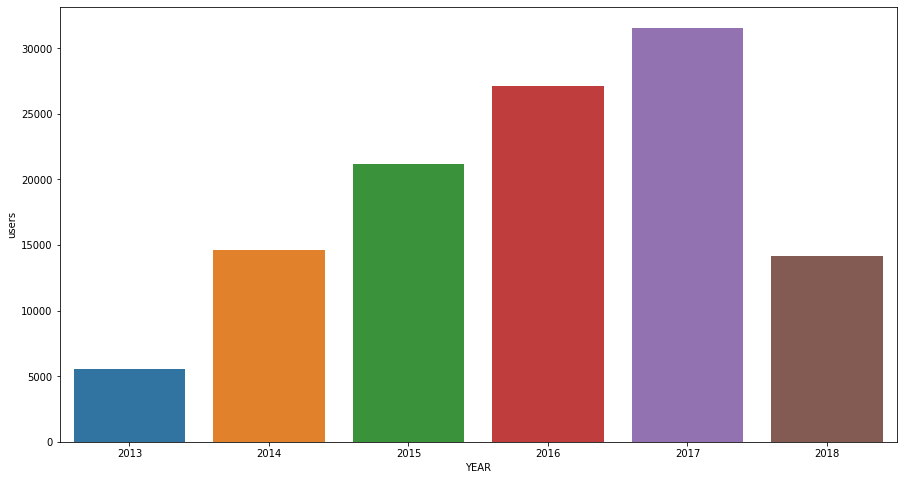

In [39]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=new_created_at, x='YEAR', y='users')

The graph above is the visualization for total users in each year. As we can see, **there is a decrease in the number of new users in 2018.**

In [ ]:
# df_users_copy = df_users.copy()
# df_users_copy = df_users_copy.filter(['id'], axis=1)
# df_users_copy.duplicated().any()
# df_users_copy.duplicated().any()
# df_users[df_users['id'].duplicated()]

## 5.2 How many users do we lost overtime?

Upon looking the table there is a column named `deleted_at`, so there must be some users who had deleted their account. Therefore, I want to count the total of deleted users from 2013 to 2018.

In [56]:
#Ceate a table containing the deleted users

deleted_at = sq('''
SELECT
  DATE(deleted_at) AS DAY,
  COUNT(DISTINCT id) AS deleted_users
FROM
  users
WHERE
  deleted_at IS NOT NULL
GROUP BY
  DAY
''')
deleted_at.head()

,DAY,deleted_users
0,2013-05-13,1
1,2013-07-01,1
2,2013-07-13,1
3,2013-08-05,2
4,2013-08-08,1


In [57]:
deleted_at['YEAR'] = pd.DatetimeIndex(deleted_at['DAY']).year
new_deleted_at = pd.DataFrame(deleted_at.groupby(['YEAR'], as_index=False).sum())
new_deleted_at

,YEAR,deleted_users
0,2013,43
1,2014,300
2,2015,548
3,2016,725
4,2017,890
5,2018,382


As we can see from the table above, here is the total users that we have in each year throughout 2013 to 2018:

* 2013 : 43 users
* 2014 : 300 users
* 2015 : 548 users
* 2016 : 725 users
* 2017 : 890 users
* 2018 : 382 users

In [60]:
aa = new_deleted_at['deleted_users'].sum()
print('We have {} deleted users from 2013 to 2018.'.format(aa))

We have 2888 deleted users from 2013 to 2018.


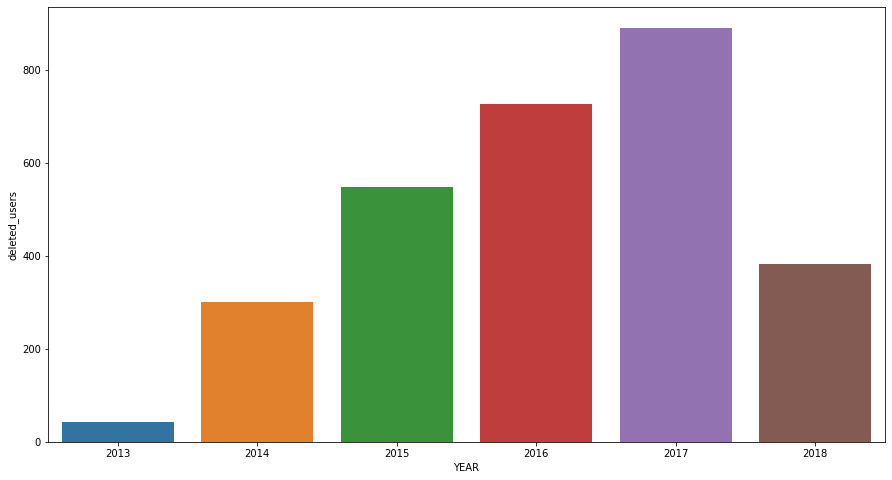

In [58]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=new_deleted_at, x='YEAR', y='deleted_users')

As we can see from the graph above, **2017 has the highest number of users who had deleted their account**.

So, if we sum the new users and deleted users, through 2013 to 2018 there 117178 users. The cell below is the total users (new users + deleted users)

In [51]:
user_count = sq1('''
SELECT 
  COUNT(DISTINCT(id)) as user_count 
FROM 
  users
''').values[0][0]

print('We have {} users'.format(user_count))

We have 117178 users


## What is the number of users who have ordered an item?

In [63]:
user_with_orders_count = sq1('''
SELECT COUNT(DISTINCT id) as number_of_users_who_have_ordered_an_item
FROM users u
INNER JOIN orders o
ON u.id = o.user_id
''').values[0][0]

print('We have {} users that have ordered items'.format(user_with_orders_count))

We have 17463 users that have ordered items
